In [10]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr

from functions import *

import sys; sys.path.append("..")
from dataset_manipulation import *
from palette import *

In [13]:
ds = xr.tutorial.load_dataset("air_temperature")

# to celsius
air = ds.air - 273.15

# resample from 6-hourly to daily values
air = air.resample(time="D").mean()

airT=air.copy()

In [19]:
processed_path = '../../processed-data/postprocessing/' #/Users/adelezaini/Desktop/master-thesis/processed-data/output/IDEAL-ON_BVOC_20082012.nc
casealias = ['CTRL','CTRL','IDEAL-ON', 'IDEAL-OFF', 'REAL-ON', 'REAL-OFF']
date = '20082012'
def load_dataset_dict(variable):
    ds_dict = {}
    for case in casealias:
        ds = xr.open_dataset(processed_path+case+'_'+variable+'_'+date+'.nc')
        ds = convert360_180(ds)
        #ds_dict[case] = ds.where(ds.LANDFRAC.mean('time')>0.)
        ds_dict[case]= ds.where(ds.lat>45., drop=True)
    return ds_dict
bvoc = load_dataset_dict('BVOC')
air = bvoc['CTRL']['SFisoprene']
bvoc['CTRL']['gw']

<xarray.DataArray 'gw' (time: 60, lat: 24)>
array([[0.02279546, 0.02199096, 0.02116241, ..., 0.00218548, 0.00109334,
        0.0001367 ],
       [0.02279546, 0.02199096, 0.02116241, ..., 0.00218548, 0.00109334,
        0.0001367 ],
       [0.02279546, 0.02199096, 0.02116241, ..., 0.00218548, 0.00109334,
        0.0001367 ],
       ...,
       [0.02279546, 0.02199096, 0.02116241, ..., 0.00218548, 0.00109334,
        0.0001367 ],
       [0.02279546, 0.02199096, 0.02116241, ..., 0.00218548, 0.00109334,
        0.0001367 ],
       [0.02279546, 0.02199096, 0.02116241, ..., 0.00218548, 0.00109334,
        0.0001367 ]])
Coordinates:
  * lat      (lat) float64 46.42 48.32 50.21 52.11 ... 84.32 86.21 88.11 90.0
  * time     (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Attributes:
    long_name:  latitude weights

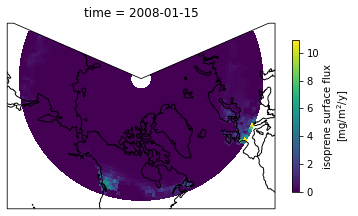

In [15]:
projection = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

f, ax = plt.subplots(subplot_kw=dict(projection=projection))

air.isel(time=0).plot(transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.7))
ax.coastlines()

In [16]:
weights = np.cos(np.deg2rad(air.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 24)>
array([6.89353409e-01, 6.65024572e-01, 6.39968541e-01, 6.14212713e-01,
       5.87785252e-01, 5.60715057e-01, 5.33031729e-01, 5.04765538e-01,
       4.75947393e-01, 4.46608807e-01, 4.16781860e-01, 3.86499169e-01,
       3.55793847e-01, 3.24699469e-01, 2.93250037e-01, 2.61479941e-01,
       2.29423920e-01, 1.97117027e-01, 1.64594590e-01, 1.31892171e-01,
       9.90455303e-02, 6.60905843e-02, 3.30633693e-02, 6.12323400e-17])
Coordinates:
  * lat      (lat) float64 46.42 48.32 50.21 52.11 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [20]:
air_weighted = air.weighted(np.cos(np.deg2rad(air.lat))).mean(("lon", "lat"))
air_weighted

DataArrayWeighted with weights along dimensions: lat

In [21]:
weighted_mean = air_weighted.mean(("lon", "lat"))
weighted_mean

<xarray.DataArray 'SFisoprene' (time: 60)>
array([1.78110177e-01, 7.52504471e-01, 3.56610379e+00, 1.98790080e+01,
       8.51659094e+01, 3.93560557e+02, 7.37744543e+02, 5.03294702e+02,
       1.25553215e+02, 1.60571691e+01, 1.11718844e+00, 1.61627829e-01,
       1.92617392e-01, 4.53929250e-01, 2.86451326e+00, 1.88007955e+01,
       8.01685705e+01, 3.07732241e+02, 6.58227180e+02, 4.88479915e+02,
       1.68278432e+02, 1.44221768e+01, 1.05017398e+00, 1.83914347e-01,
       1.88506167e-01, 6.81561481e-01, 3.67622456e+00, 1.85650726e+01,
       8.80289831e+01, 4.00279347e+02, 8.63088355e+02, 5.75746634e+02,
       1.25843239e+02, 1.79786431e+01, 1.31130799e+00, 1.68886120e-01,
       1.91993946e-01, 5.00004760e-01, 3.54826092e+00, 1.98132975e+01,
       9.61334701e+01, 4.24041688e+02, 8.42612826e+02, 5.20204277e+02,
       1.47111065e+02, 2.26237228e+01, 1.13865593e+00, 2.26220961e-01,
       2.01715079e-01, 5.77298147e-01, 4.44706760e+00, 1.83044464e+01,
       1.01055580e+02, 5.07152083e+02, 1.01991548e+03, 5.66891997e+02,
       1.50840346e+02, 1.67370008e+01, 9.29494426e-01, 1.87809015e-01])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Attributes:
    units:         mg/m$^2$/y
    long_name:     isoprene surface flux
    cell_methods:  time: mean

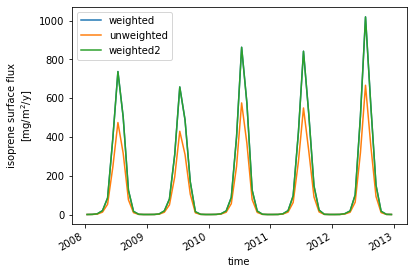

In [25]:
weighted_mean.plot(label="weighted")
air.mean(("lon", "lat")).plot(label="unweighted")
air.weighted(bvoc['CTRL']['gw']).mean(['lat','lon']).plot(label="weighted2")

plt.legend()

In [34]:
air.weighted(bvoc['CTRL']['gw'])

DataArrayWeighted with weights along dimensions: time, lat

In [35]:
weighted1 = air.weighted(np.cos(np.deg2rad(air.lat))).mean(("lon", "lat"))
weighted2 = air.weighted(bvoc['CTRL']['gw'].isel(time=0)).mean(['lon','lat'])


(weighted2 - weighted1)/weighted1

<xarray.DataArray 'SFisoprene' (time: 60)>
array([-0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617,
       -0.00047617, -0.00047617, -0.00047617, -0.00047617, -0.00047617])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Attributes:
    units:         mg/m$^2$/y
    long_name:     isoprene surface flux
    cell_methods:  time: mean

In [ ]:
https://github.com/sarambl/OAS-ERF/blob/d0da04d58b4f5fdd2f5433f173e0738a2b9f97b3/oas_erf/util/slice_average/area_mod.py